##### 1. Import Libraries and Datasets

In [ ]:
# Import libraries
import pandas as pd 
import numpy as np
import openpyxl

In [ ]:
# Import datasets
raw_data1 = pd.read_excel("LexisNexis_cleaned.xlsx", na_values=["", " ", "NA", "na"])
raw_data2 = pd.read_excel("SGHDigimind.xlsx", usecols="B,C,E,G", na_values=["", " ", "NA", "na"])

print("Lexis Nexus dataset dimensions are:", raw_data1.shape)
raw_data1.head()

c:\Users\Ervin\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Lexis Nexus dataset dimensions are: (265, 4)


,title,publication_list,text,load_date
0,"Jail for man who hurled vulgarities, racially ...",The Straits Times (Singapore),"During a taxi ride last year, a passenger hurl...","August 26, 2021"
1,"Jailed for break-in, hurting woman out of jeal...",The Straits Times (Singapore),Angry that the woman he had feelings for could...,"August 26, 2021"
2,"To fight lymphoma, cancer patient first in Sin...",Today (Singapore) - Online,SINGAPORE - Cycling enthusiast Sam Tan used to...,"August 28, 2021"
3,NDR 2021: Muslim staff in public healthcare se...,Today (Singapore) - Online,"SINGAPORE -Â From Nov 1, Muslim staff working...","August 29, 2021"
4,Kampong Bahru: From KTVs to cafes; Loud music ...,The Straits Times (Singapore),If you have heard of Kampong Bahru Road - a st...,"August 28, 2021"


In [ ]:
print("SGH Digimind dataset dimensions are:", raw_data2.shape)
raw_data2.head()

SGH Digimind dataset dimensions are: (2266, 4)


,Title,Detail,Source,Publish date
0,"Sleep Disorders | Mind Your Body Tickets, Wed ...",Important Notice \n\nThis programme is open to...,eventbrite.sg,09/06/2022 14:06:01
1,Driver busted alcohol limit and BMW was speedi...,SINGAPORE - The coroner's inquiry into the dea...,straitstimes.com,09/06/2022 13:02:40
2,"Driver busted alcohol limit, was speeding at 1...",SINGAPORE - The coroner's inquiry into the dea...,straitstimes.com,09/06/2022 13:02:40
3,"Driver busted alcohol limit, speeding at 148km...","(Clockwise from left) Mr Teo Qi Xiang, Mr Elvi...",tnp.straitstimes.com,09/06/2022 16:03:57
4,保持健康并不难，卫生部长王乙康邀请“舞叔”Uncle Raymond到新加坡中央医院，带领医...,保持健康并不难，卫生部长王乙康邀请“舞叔”Uncle Raymond到新加坡中央医院，带领医...,twitter.com,09/06/2022 16:15:58


In [ ]:
# Rename the dataset columns
raw_data1.columns = ["title", "source", "article_body", "publication_date"]
raw_data2.columns = ["title", "article_body", "source", "publication_date"]

# Reorder the dataset columns
raw_data1 = raw_data1[["title", "article_body", "source", "publication_date"]]

raw_data1.head(3)

,title,article_body,source,publication_date
0,"Jail for man who hurled vulgarities, racially ...","During a taxi ride last year, a passenger hurl...",The Straits Times (Singapore),"August 26, 2021"
1,"Jailed for break-in, hurting woman out of jeal...",Angry that the woman he had feelings for could...,The Straits Times (Singapore),"August 26, 2021"
2,"To fight lymphoma, cancer patient first in Sin...",SINGAPORE - Cycling enthusiast Sam Tan used to...,Today (Singapore) - Online,"August 28, 2021"


##### 2. Preliminary data pre-processing and check for NULL values

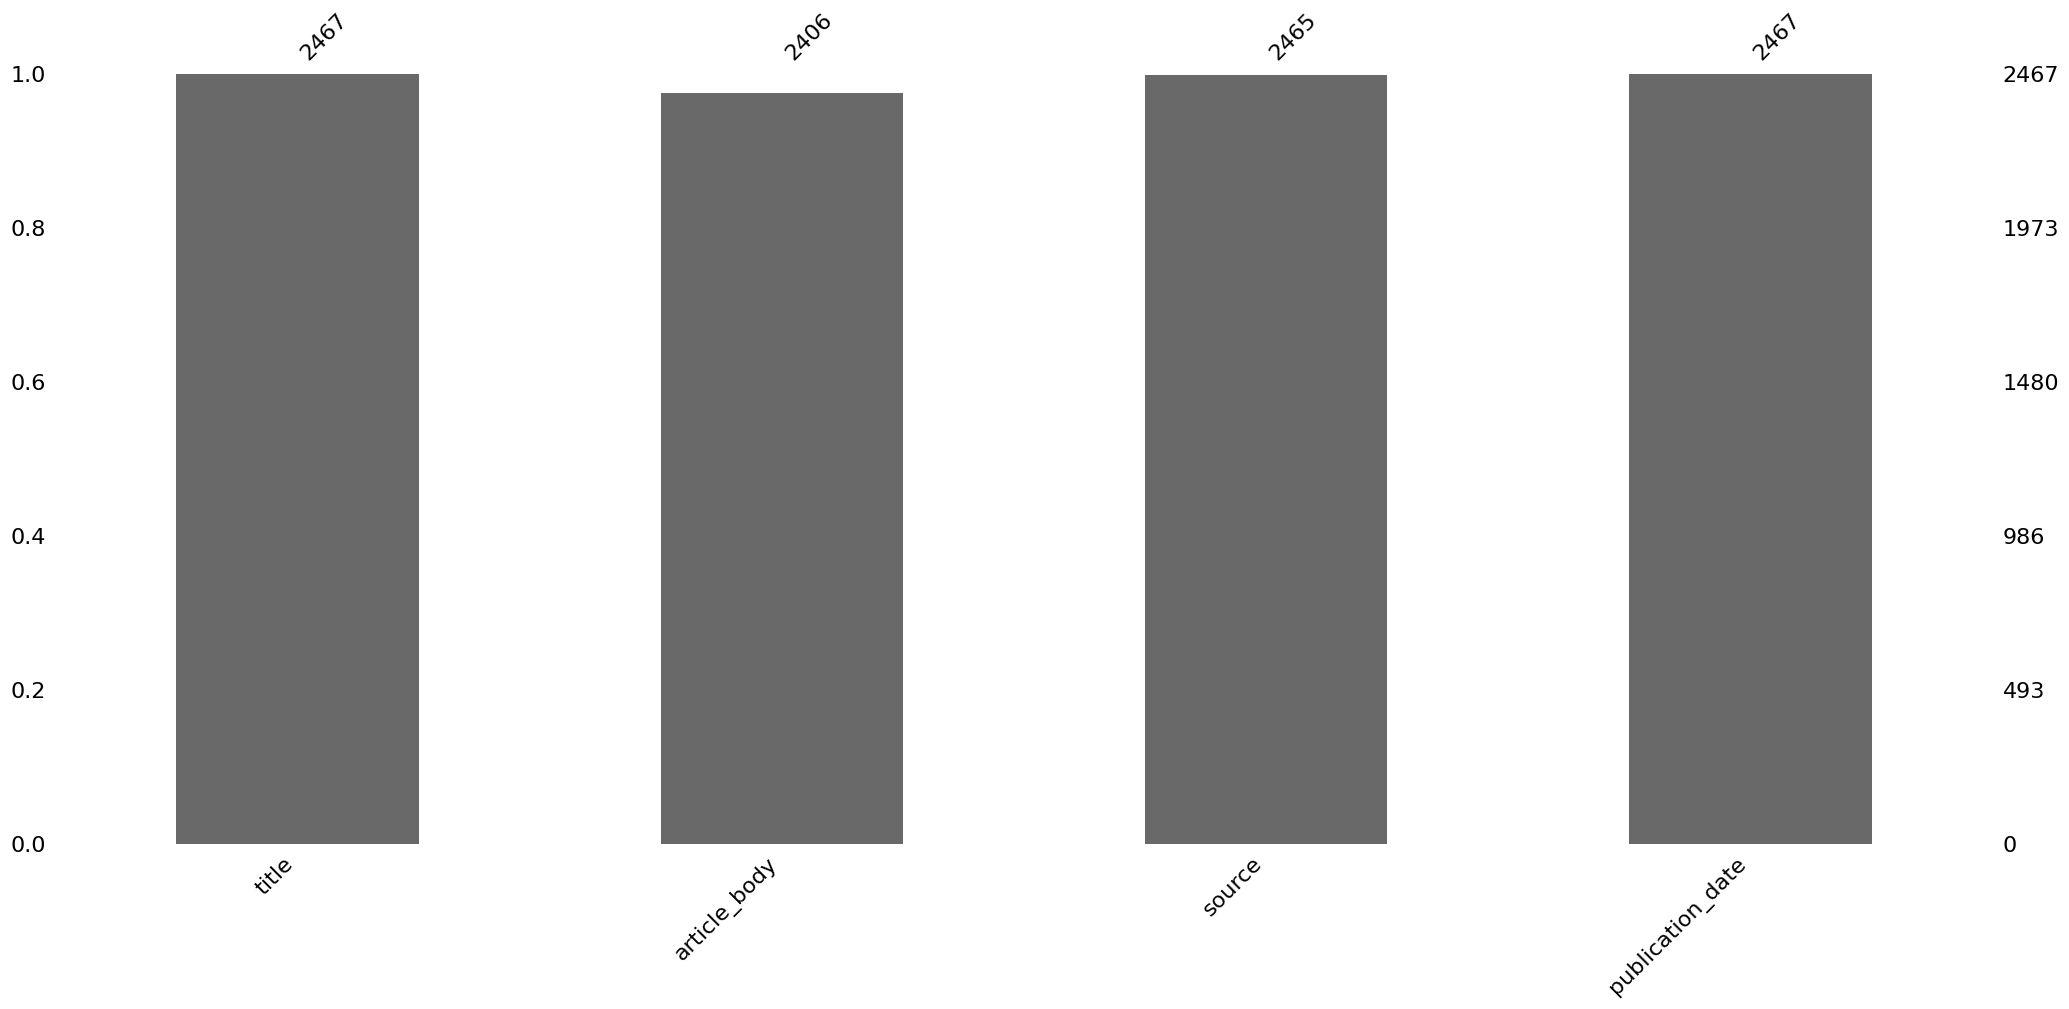

In [ ]:
# Concatenate the datasets into a single consolidated dataframe
df = pd.concat([raw_data1, raw_data2], axis=0)

# Remove duplicates
df = df.drop_duplicates()

# Drop NAs
import missingno as msno
msno.bar(df)

df = df[df['article_body'].notna()]


In [ ]:
print("Final dataset dimensions are:", df.shape)
df.head(3)

Final dataset dimensions are: (2406, 4)


,title,article_body,source,publication_date
0,"Jail for man who hurled vulgarities, racially ...","During a taxi ride last year, a passenger hurl...",The Straits Times (Singapore),"August 26, 2021"
1,"Jailed for break-in, hurting woman out of jeal...",Angry that the woman he had feelings for could...,The Straits Times (Singapore),"August 26, 2021"
2,"To fight lymphoma, cancer patient first in Sin...",SINGAPORE - Cycling enthusiast Sam Tan used to...,Today (Singapore) - Online,"August 28, 2021"


##### 3. Use SpaCy for language detection

In [ ]:
# 1. Install LangDetect  
# Port of Google’s language-detection library (~50 languages), developed by Nakatani Shuyo at Cybozu Labs, Inc.
# REF: https://towardsdatascience.com/4-nlp-libraries-for-automatic-language-identification-of-text-data-in-python-cbc6bf664774

# # Install LangDetect
# !pip install langdetect
# from langdetect import detect, detect_langs

# def language_detection(text, method = "single"):

#   """
#   @desc: 
#     - detects the language of a text
#   @params:
#     - text: the text which language needs to be detected
#     - method: detection method: 
#       single: if the detection is based on the first option (detect)
#   @return:
#     - the langue/list of languages
#   """

#   if(method.lower() != "single"):
#     result = detect_langs(text)

#   else:
#     result = detect(text)

# 2. Alternatively, setup virtual environment with conda (-n sghmm) before running Google Compact Language Detector 3 (CLD3)
# A Neural Network language identification library developed by Google - pre-trained model supports ~100 languages
# REF: https://towardsdatascience.com/introduction-to-googles-compact-language-detector-v3-in-python-b6887101ae47

# 3. Use SpaCy Language Models to detect language
# !pip install -U spacy
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

# def spacy_language_detection(text, model):
#   pipeline = list(dict(model.pipeline).keys())

#   if(not "language_detector" in pipeline):
#       model.add_pipe('language_detector', name = "language_detector", last=True)
#   doc = model(text)
#   return doc._.language

def spacy_language_detection(text):
      
      def get_lang_detector(nlp, name):
            return LanguageDetector()
  
      nlp = spacy.load("en_core_web_sm")
      Language.factory("language_detector", func=get_lang_detector)
      nlp.add_pipe('language_detector', last=True)
      doc = nlp(text)
      return doc._.language


In [ ]:
# Analyse dataset articles for language filtering scores by applying SpaCy Language Detection
# df["lang_detection"] = df["article_body"].apply(lambda x: spacy_language_detection(x))

# Create new features for language detected and probability scores
# df["lang"] = df["lang_detection"].apply(lambda x: x["language"])
# df["score"] = df["lang_detection"].apply(lambda x: x["score"])

# df.head(3)

In [ ]:
# Export the cleaned dataframe for future use
# df.to_csv("df_cleaned.csv")

In [ ]:
# Load_clean df
df = pd.read_csv("df_cleaned.csv", index_col=0)

# Check for language distribution
print(df["lang"].value_counts().head(15))

en         2070
zh-cn       142
id           67
UNKNOWN      18
tl           15
de           11
it           10
fr            9
nl            9
af            7
no            7
ca            5
ro            4
so            4
sv            3
Name: lang, dtype: int64


In [ ]:
# Check some instances of foreign languages - Unknown language
df[df["lang"]=="UNKNOWN"].head()

# These appear to be mainly URL links that can be discarded

,title,article_body,source,publication_date,lang_detection,lang,score
183,https://t.me/+Vfhed-8zGUhjYTA0,https://t.me/+Vfhed-8zGUhjYTA0,facebook.com,22/06/2022 17:21:09,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,0.0
260,https://t.me/+2eKIwjVdfs00Nzg8,https://t.me/+2eKIwjVdfs00Nzg8,facebook.com,28/06/2022 23:56:47,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,0.0
300,"<a href=""https://www.facebook.com/106738085275...",https://www.facebook.com/106738085275012/posts...,facebook.com,18/05/2022 02:17:37,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,0.0
775,:+1:,:+1:,facebook.com,06/05/2022 17:44:48,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,0.0
884,:+1:,:+1:,facebook.com,17/05/2022 04:15:36,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,0.0


In [ ]:
df[df["lang"]=="de"].head()

# These include genuine articles from German sources but also mis-identified articles

,title,article_body,source,publication_date,lang_detection,lang,score
127,THE SINGAPORE GENERAL HOSPITAL WAS UNDERING BU...,THE SINGAPORE GENERAL HOSPITAL WAS UNDERING BU...,facebook.com,17/06/2022 14:09:53,"{'language': 'de', 'score': 0.7142846629218476}",de,0.714285
486,Karen Humphreys,Karen Humphreys,facebook.com,02/06/2022 19:28:17,"{'language': 'de', 'score': 0.9999955857783185}",de,0.999996
529,Tine Tine Mendoza,Tine Tine Mendoza,facebook.com,05/06/2022 14:18:48,"{'language': 'de', 'score': 0.9999930402057079}",de,0.999993
994,"FIXED MATCHES AVAILABLE <a href=""\nhttps://t.m...",FIXED MATCHES AVAILABLE \nhttps://t.me/chrisja...,facebook.com,05/04/2022 16:49:57,"{'language': 'de', 'score': 0.857137047336629}",de,0.857137
1231,"SingHealth, NSCC und NVIDIA schließen sich für...","SingHealth, das National Supercomputing Centre...",germanic.news,02/03/2022 20:19:42,"{'language': 'de', 'score': 0.9999982625724435}",de,0.999998


In [ ]:
df[df["lang"]=="it"].head()

# The italian-identified articles seem to be mis-identified, as well as include emoticons denoted by the (:emoji:) format.

,title,article_body,source,publication_date,lang_detection,lang,score
190,Congratulations Nurse Loke\n:bouquet::bouquet:...,Congratulations Nurse Loke\n:bouquet::bouquet:...,facebook.com,23/06/2022 13:11:07,"{'language': 'it', 'score': 0.5714271482366654}",it,0.571427
272,ConGratz Aini. Well done.,ConGratz Aini. Well done.,facebook.com,29/06/2022 22:50:00,"{'language': 'it', 'score': 0.9999947600630823}",it,0.999995
288,Congratulations hazziq,Congratulations hazziq,facebook.com,30/06/2022 15:05:01,"{'language': 'it', 'score': 0.5714284620199223}",it,0.571428
643,SGH (Singapore General Hospital),SGH (Singapore General Hospital),asiaone.com,25/04/2022 16:43:40,"{'language': 'it', 'score': 0.8571372572767847}",it,0.857137
647,Dorscon,Dorscon,facebook.com,26/04/2022 06:13:29,"{'language': 'it', 'score': 0.9999948933251765}",it,0.999995


In [ ]:
# Keep only english-language articles
df_eng = df[df["lang"]=="en"]
df_eng.reset_index(drop=True, inplace=True)

##### 4. EDA

In [1]:
!pip install cufflinks
import cufflinks as cf # Cufflinks is a very useful add-on to plot figures directly from the dataframe series object

cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [2]:
df_eng_top20sources = df_eng['source'].value_counts().head(20)

NameError: name 'df_eng' is not defined

In [ ]:
# Visualise the length of the article bodies
df_eng["article_length"] = df_eng["article_body"].apply(lambda x: len(x))

df_eng.head(3)

,title,article_body,source,publication_date,lang_detection,lang,score,article_length
0,"Jail for man who hurled vulgarities, racially ...","During a taxi ride last year, a passenger hurl...",The Straits Times (Singapore),"August 26, 2021","{'language': 'en', 'score': 0.9999956131050753}",en,0.999996,2032
1,"Jailed for break-in, hurting woman out of jeal...",Angry that the woman he had feelings for could...,The Straits Times (Singapore),"August 26, 2021","{'language': 'en', 'score': 0.9999976989837951}",en,0.999998,2911
2,"To fight lymphoma, cancer patient first in Sin...",SINGAPORE - Cycling enthusiast Sam Tan used to...,Today (Singapore) - Online,"August 28, 2021","{'language': 'en', 'score': 0.999996067727801}",en,0.999996,9178


In [ ]:
# Visualise the length of the article bodies
# !pip install nbformat
configure_plotly_browser_state()

df_eng["article_length"].iplot(kind='hist', bins=100, xTitle='Article Body Length', linecolor='black', yTitle='count', title='Media Source Distribution')

In [ ]:
# Visualise the distribution of the top 20 english-language article sources 
# !pip install nbformat
configure_plotly_browser_state()

df_eng_top20sources.iplot(kind='bar', bins=20, xTitle='Media Sources', linecolor='black', yTitle='count', title='Media Source Distribution')

In [ ]:
# NLTK word frequency
# !pip install nltk
import nltk
import string

# from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Data cleaning
def data_cleaner(text):
    PUNCT_TO_REMOVE = string.punctuation

    stemmer = PorterStemmer()
    text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    text = text.lower().split() # lowercase all text    
    text = [word for word in text if word not in set(stopwords.words('english')+ ["patient", "said", "sgh", "take", "use", "help"])] # Remove stopwords
    text = [word for word in text if not word.isdigit()]
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

df_eng['article_body'] = df_eng['article_body'].apply(lambda x: data_cleaner(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ervin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Check most frequent words 
from collections import Counter

most_cnt = Counter()
for text in df_eng["article_body"].values:
    for word in text.split():
        most_cnt[word] += 1
        
most_cnt.most_common(20)

[('singapor', 2249),
 ('hospit', 1748),
 ('gener', 908),
 ('year', 852),
 ('patient', 833),
 ('also', 816),
 ('mr', 758),
 ('one', 681),
 ('covid19', 634),
 ('time', 616),
 ('peopl', 573),
 ('care', 550),
 ('dr', 543),
 ('medic', 531),
 ('health', 527),
 ('work', 514),
 ('two', 503),
 ('healthcar', 497),
 ('fire', 488),
 ('nation', 473)]

In [ ]:
def remove_freq_words(text):

    # Top 20 most frequent words
    FREQWORDS = set([w.lower() for (w, wc) in most_cnt.most_common(20)])

    text = text.lower().split() # lowercase all text
    text = [word for word in text if word not in FREQWORDS]
    text = " ".join(text)
    return text

df_eng['article_body'] = df_eng['article_body'].apply(lambda x: remove_freq_words(x))

In [ ]:
# Check least frequent words 
from collections import Counter

least_cnt = Counter()

for text in df_eng["article_body"].values:
    for word in text.split():
        least_cnt[word] += 1
        
list(reversed(least_cnt.most_common(20)))

[('vaccin', 320),
 ('unit', 323),
 ('home', 331),
 ('worker', 334),
 ('could', 340),
 ('get', 341),
 ('need', 345),
 ('nurs', 347),
 ('treatment', 348),
 ('public', 366),
 ('ad', 367),
 ('would', 373),
 ('tan', 379),
 ('last', 386),
 ('case', 397),
 ('may', 413),
 ('cancer', 435),
 ('day', 447),
 ('new', 453),
 ('ms', 465)]

In [ ]:
def remove_leastfreq_words(text):

    # Top 20 most frequent words
    RAREWORDS = set([w for (w, wc) in reversed(least_cnt.most_common(20))])

    text = text.lower().split() # lowercase all text
    text = [word for word in text if word not in RAREWORDS]
    text = " ".join(text)
    return text

df_eng['article_body'] = df_eng['article_body'].apply(lambda x: remove_leastfreq_words(x))

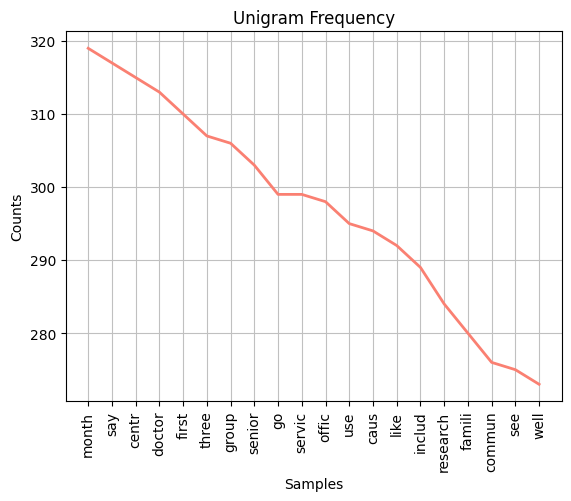

In [ ]:
all_words=[]        
for i in range(len(df_eng['article_body'].values)):
    all_words += df_eng['article_body'][i].split()

# Visualise word frequency for unigrams        
nlp_words = nltk.FreqDist(all_words)
unigram = nlp_words.plot(20, color='salmon', title='Unigram Frequency')

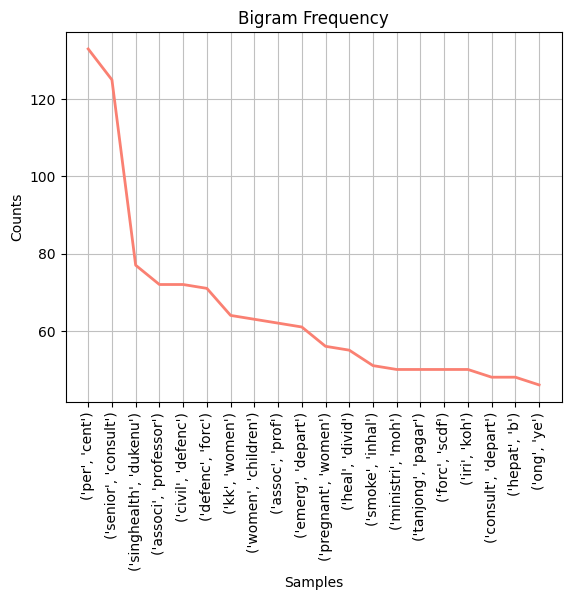

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
import nltk
from nltk.collocations import *

# Visualise word frequency for bigrams  
bigram = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigram)
words_2.plot(20, color='salmon', title='Bigram Frequency')

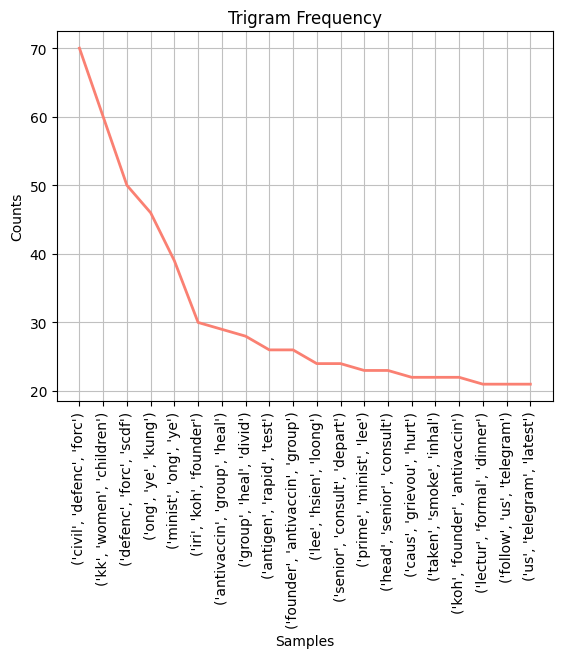

<AxesSubplot:title={'center':'Trigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Visualise word frequency for trigrams
trigram = list(nltk.trigrams(all_words))
words_2 = nltk.FreqDist(trigram)
words_2.plot(20, color='salmon', title='Trigram Frequency')

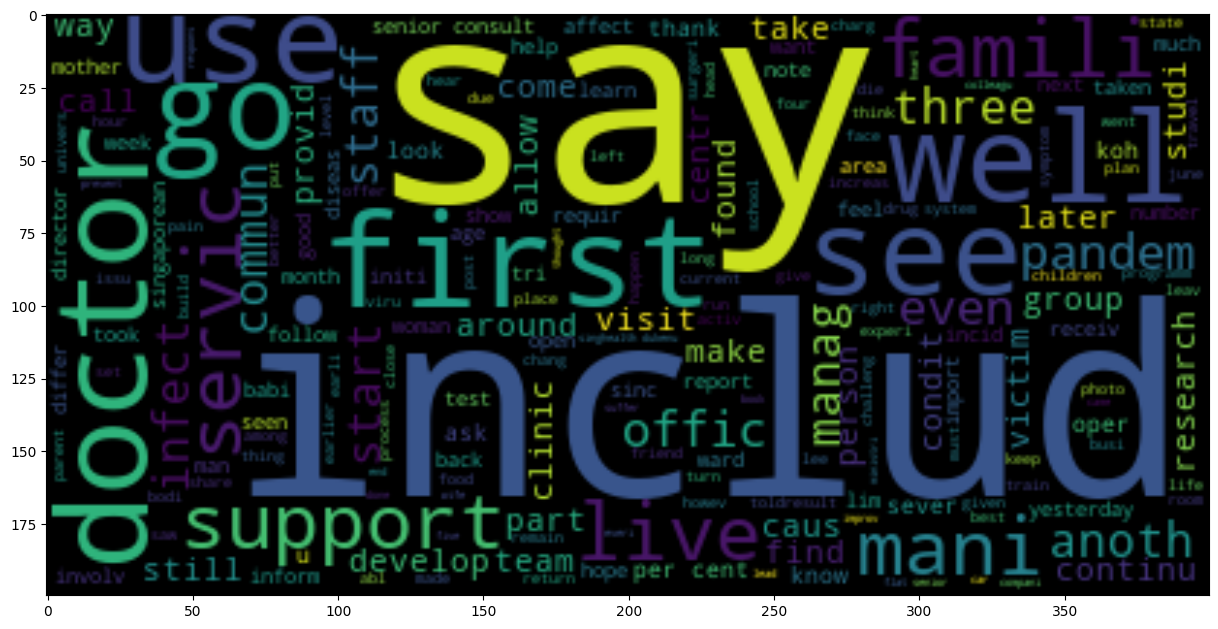

In [ ]:
# Visualize Word Cloud
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_before = WordCloud().generate(' '.join(df_eng['article_body']))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_before, interpolation='bilinear')